<a href="https://colab.research.google.com/github/doguctan/python_examples/blob/master/collab%20deneme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

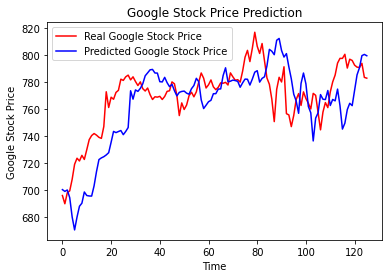

In [31]:
import pandas as pd
import os
import numpy as np

from google.colab import files
uploaded = files.upload()

del uploaded

from preprocessing import preprocessing
from regression import regression
from classification import classification


import io

dataset_train = pd.read_csv(io.BytesIO(uploaded['Google_Stock_Price_Train.csv']))
X = dataset_train.iloc[:, [1,3]].values


nbrofnans=10
X_temp=X[0:len(X)-nbrofnans,]
nans=[[np.nan,np.nan]]
for i in range(nbrofnans-1):
    nans=np.append(nans,[[np.nan,np.nan]],axis=0)
X=np.append(nans,X_temp,axis=0)

Y=dataset_train.iloc[:, [1]].values
#create X matrix according to lag we wantto create

#model is created all the preprocessing of data is done
mymodel=regression(X=X,Y=Y,run_at_init=False,split_type='TIMESERIES',split_detail=0.1)

mymodel.run(model_type='lin_reg')


#Test of predict method
xtest=X[len(X)-20:len(X)]
ytest=xtest[:,0]
ypred=mymodel.predict(xtest)
#Test of predict method

# Visualising the results
import matplotlib.pyplot as plt

plt.plot(mymodel.modelvariables.Y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(mymodel.Y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

plt.plot(ytest, color = 'red', label = 'Real Google Stock Price')
plt.plot(ypred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
# Visualising the results


print(uploaded)
